Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8520 - loss: 0.5036 - val_accuracy: 0.9640 - val_loss: 0.1267
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9518 - loss: 0.1582 - val_accuracy: 0.9713 - val_loss: 0.0946
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9657 - loss: 0.1137 - val_accuracy: 0.9745 - val_loss: 0.0864
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9713 - loss: 0.0921 - val_accuracy: 0.9773 - val_loss: 0.0789
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9758 - loss: 0.0769 - val_accuracy: 0.9787 - val_loss: 0.0748
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.9727 - loss: 0.0938
Presnost na testovacich datach: 0.9769


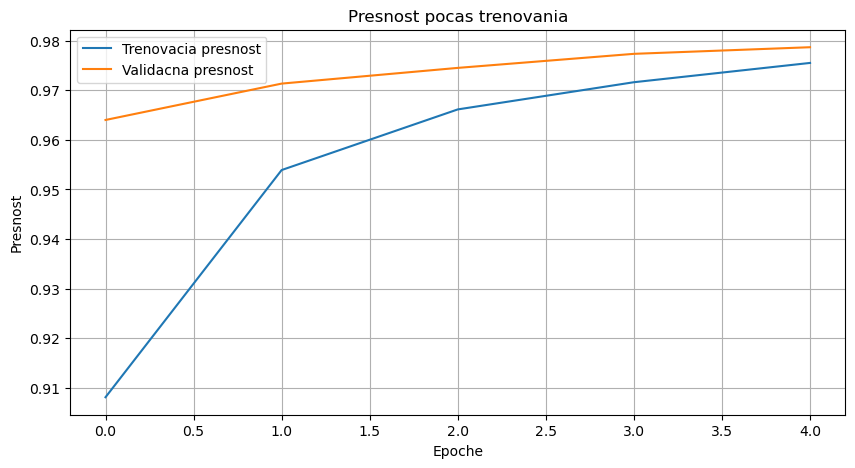

In [ ]:
#!pip install tensorflow matplotlib

import tensorflow as tf
import matplotlib.pyplot as plt

# ======================================================================================
# nacitanie dat
# ======================================================================================
# dataset MNIST (vraj to kazdy pouziva)
mnist = tf.keras.datasets.mnist

# nacitanie trenovacich a testovacich dat
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# normalizacia obrazkov (z 0-255 na 0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# reshape ak treba (tu nie je potrebne pretoze pouzijeme Dense vrstvy)

# ======================================================================================
# definicia modelu neuronovej siete
# ======================================================================================
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),     # premeni 28x28 obrazok na vektor 784 prvkov
    tf.keras.layers.Dense(128, activation='relu'),     # skryta vrstva s 128 neuronmi a relu aktivaciou
    tf.keras.layers.Dropout(0.2),                      # dropout pre znizenie overfittingu
    tf.keras.layers.Dense(10, activation='softmax')    # vystupna vrstva - 10 tried s pravdepodobnostami
])

# ======================================================================================
# kompilacia modelu
# ======================================================================================
model.compile(
    optimizer='adam',                            # uciaci algoritmus 
    loss='sparse_categorical_crossentropy',      # vhodne pre klasifikaciu tried
    metrics=['accuracy']                         # metrika presnosti
)

# ======================================================================================
# trenovanie modelu
# ======================================================================================
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

# ======================================================================================
# vyhodnotenie modelu
# ======================================================================================
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Presnost na testovacich datach: {test_accuracy:.4f}")

# ======================================================================================
# vykreslenie grafu priebehu trenovania
# ======================================================================================
def vykresli_historiu_treningu(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Trenovacia presnost')
    plt.plot(history.history['val_accuracy'], label='Validacna presnost')
    plt.title('Presnost pocas trenovania')
    plt.xlabel('Epoche')
    plt.ylabel('Presnost')
    plt.legend()
    plt.grid(True)
    plt.show()

vykresli_historiu_treningu(history)
# ulozanie modelu 
# model.save('mnist_model.h5') 
# alebo SavedModel format
#model.save('mnist_model')  # ulozi priecinok s modelom
